# Customer Segmentation Model for Targeted Marketing Strategies

## Introduction:
This Jupyter Notebook presents a customer segmentation model designed to identify distinct customer segments using clustering analysis. By analyzing customer data, this model aims to uncover patterns and group customers based on their characteristics, allowing businesses to develop targeted marketing strategies.

## Dataset:
The dataset used in this project consists of customer data, including information such as Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, and Rating. This data will serve as the basis for performing customer segmentation.

## Steps Covered:
1. **Importing the Required Libraries**: Importing necessary libraries for data manipulation, visualization, and clustering analysis.
2. **Loading and Understanding the Data**: Loading the customer data into a Pandas DataFrame and gaining initial insights by examining the data structure, summary statistics, and data types.
3. **Exploratory Data Analysis (EDA)**: Performing exploratory data analysis to understand the distribution of categorical variables and numerical features through visualizations and histograms.
4. **Data Preprocessing**: Preprocessing the data by handling missing values, encoding categorical variables using label encoding, and scaling numerical features using standardization.
5. **Model Training and Evaluation**: Applying clustering analysis, specifically K-means clustering, to segment the customers and determining the optimal number of clusters using the silhouette score. Training the K-means clustering model with the chosen number of clusters and assigning cluster labels to the original data.
6. **Interpretation and Visualization**: Analyzing the clusters by calculating the mean values of each feature within each cluster and visualizing the clusters using scatter plots or other appropriate plots.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the data into a DataFrame
data = pd.read_csv('supermarket_sales.csv')

# Display the first few rows of the DataFrame
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


1. **Invoice ID**: A unique identifier for each invoice or transaction.

2. **Branch**: The branch or location of the retail store where the transaction occurred.

3. **City**: The city where the retail store is located.

4. **Customer type**: Indicates whether the customer is a member of a loyalty program or a regular customer.

5. **Gender**: The gender of the customer.

6. **Product line**: The category or type of product purchased by the customer.

7. **Unit price**: The price of a single unit of the product.

8. **Quantity**: The number of units of the product purchased.

9. **Tax 5%**: The amount of tax (5% of the total price) applied to the product.

10. **Total**: The total amount paid by the customer for the product.

11. **Date**: The date of the transaction.

12. **Time**: The time of the transaction.

13. **Payment**: The method of payment used by the customer.

14. **COGS**: Cost of Goods Sold, the cost of producing or acquiring the product.

15. **Gross margin percentage**: The percentage difference between the selling price and the COGS.

16. **Gross income**: The gross profit generated from the sale of the product.

17. **Rating**: The customer's rating or satisfaction score for the product or overall experience.


In [3]:
# Check the summary statistics of the numerical features
print(data.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

In [4]:
# Check the data types of each column
print(data.dtypes)

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


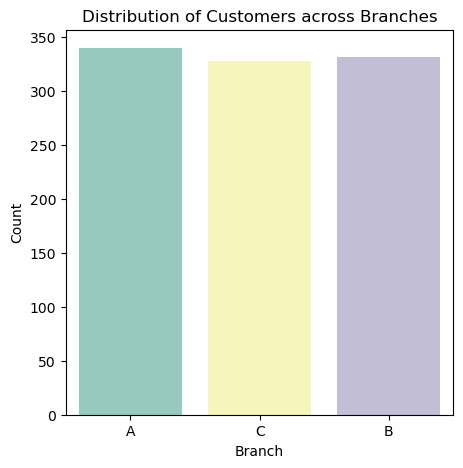

In [5]:
# Step 3: Exploratory Data Analysis (EDA)

# Distribution of Customers across Branches
plt.figure(figsize=(5, 5))
sns.countplot(x='Branch', data=data, palette='Set3')
plt.title('Distribution of Customers across Branches')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.show()

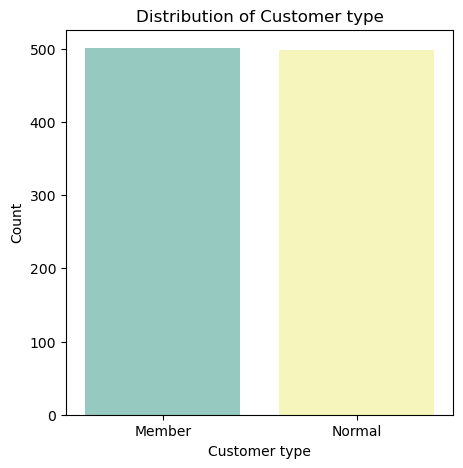

In [6]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Customer type', data=data, palette='Set3')
plt.title('Distribution of Customer type')
plt.xlabel('Customer type')
plt.ylabel('Count')
plt.show()

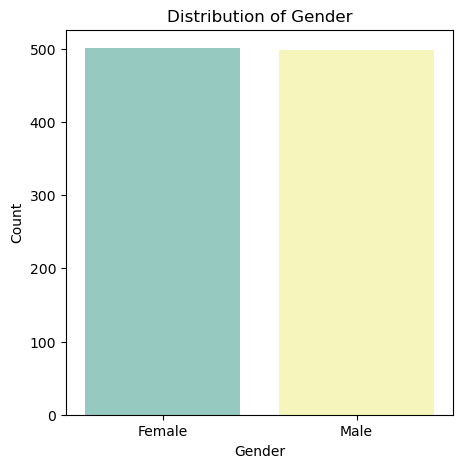

In [7]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Gender', data=data, palette='Set3')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

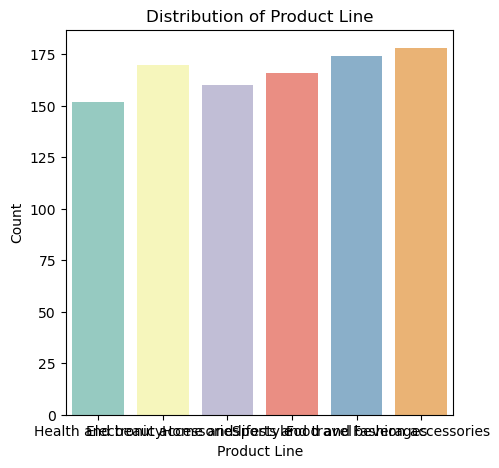

In [8]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Product line', data=data, palette='Set3')
plt.title('Distribution of Product Line')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.show()

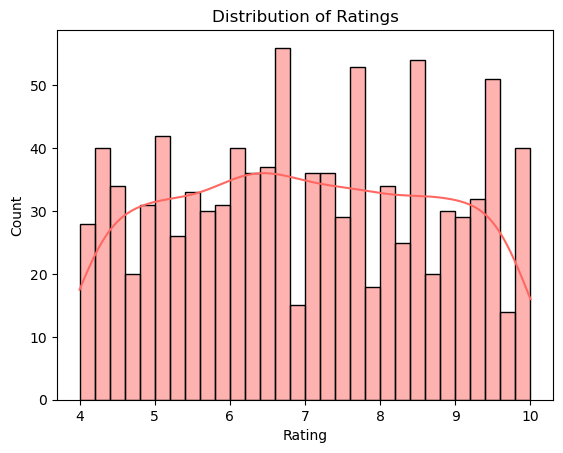

In [9]:
# Explore the numerical features
sns.histplot(data['Rating'], kde=True,  bins=30, edgecolor='black', color='#FF6862')
plt.title('Distribution of Ratings')
plt.show()

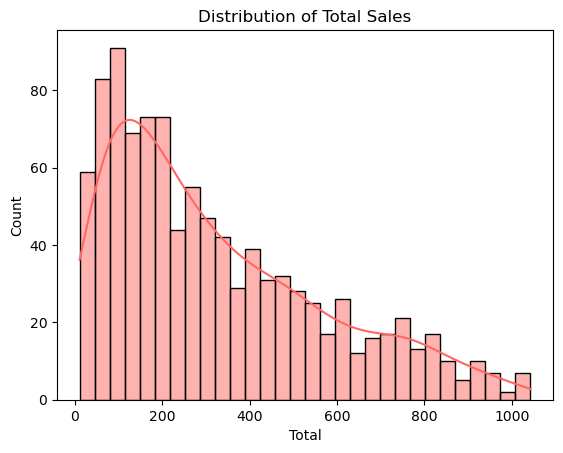

In [10]:
sns.histplot(data['Total'], kde=True, color='#FF6862', bins=30)
plt.title('Distribution of Total Sales')
plt.show()

In [11]:
# Step 4: Data Preprocessing

# Check for missing values
print(data.isnull().sum())


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [12]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [13]:
# Scale the numerical features
scaler = StandardScaler()
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [14]:
# Step 5: Model Training and Evaluation

# Select the relevant features for clustering
features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line',
            'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment',
            'cogs', 'gross margin percentage', 'gross income', 'Rating']

X = data[features]

In [15]:
# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

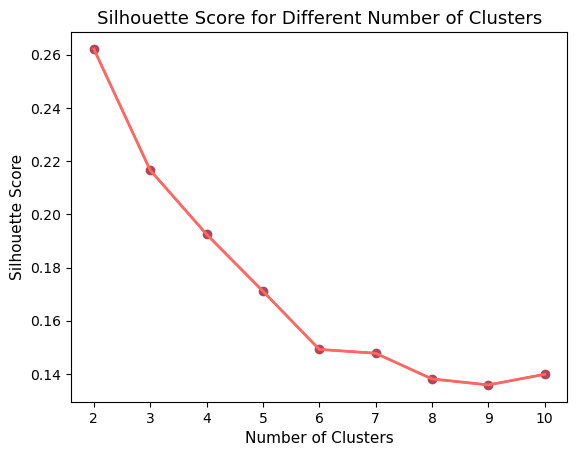

In [16]:
# Plot the silhouette scores for different numbers of clusters
import matplotlib.pyplot as plt
# Add markers
plt.plot(range(2, 11), silhouette_scores, color='#B04759', marker='o')

# Adjust line width
plt.plot(range(2, 11), silhouette_scores, color='#FF6862', linewidth=2)
plt.xlabel('Number of Clusters', fontsize=11)
plt.ylabel('Silhouette Score', fontsize=11)
plt.title('Silhouette Score for Different Number of Clusters', fontsize=13)
plt.show()


In [17]:
# Choose the optimal number of clusters based on the highest silhouette score
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

In [18]:
# Train the K-means clustering model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

In [19]:
# Assign the cluster labels to the original data
data['Cluster'] = cluster_labels

In [20]:
# Step 6: Interpretation and Visualization

# Analyze the clusters
cluster_analysis = data.groupby('Cluster').mean()
cluster_analysis

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
Cluster,,,,,,,,,,,,,,
0,0.964179,1.016418,0.507463,0.514925,2.426866,-0.387422,-0.401845,-0.598944,-0.598944,1.00000,-0.598944,0.0,-0.598944,0.015372
1,1.036364,0.990909,0.481818,0.466667,2.503030,0.786584,0.815868,1.216037,1.216037,1.00303,1.216037,0.0,1.216037,-0.031209


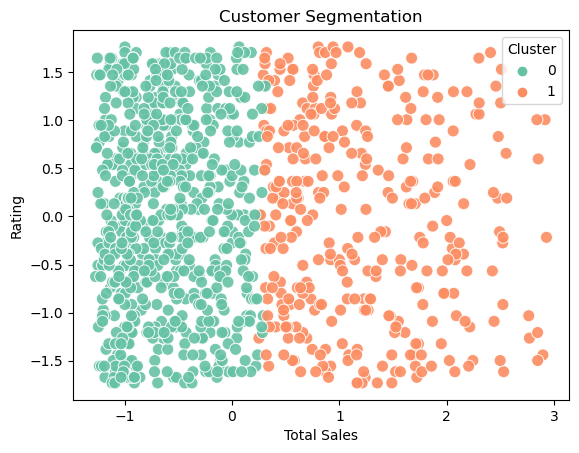

In [21]:
# Visualize the clusters
sns.scatterplot(x='Total', y='Rating', hue='Cluster', data=data, palette='Set2', s=75, alpha=0.9)
plt.title('Customer Segmentation')
plt.xlabel('Total Sales')
plt.ylabel('Rating')
plt.show()

## Conclusion - Customer Segmentation Results

In conclusion, the customer segmentation analysis has successfully identified distinct customer segments based on their total sales and ratings. This segmentation provides valuable insights for targeted marketing strategies, allowing businesses to personalize their approach and improve customer engagement, ultimately driving business success.